NETFLIX DATASET 

In [203]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
#import csv files
df = pd.read_csv('netflix_titles_2021.csv')

In [205]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [206]:
df.shape

(8807, 12)

In [207]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [209]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [210]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [211]:
#Check the difference between total values and unique values
value_count = pd.concat([df.nunique(), df.count()], axis = 1, keys = ['Unique values', 'Total values'])
value_count

,Unique values,Total values
show_id,8807,8807
type,2,8807
title,8807,8807
director,4528,6173
cast,7692,7982
country,748,7976
date_added,1767,8797
release_year,74,8807
rating,17,8803
duration,220,8804


In [212]:
#Check for duplicate values
df.duplicated().sum()

0

In [213]:
#Now check for missing or null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [214]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


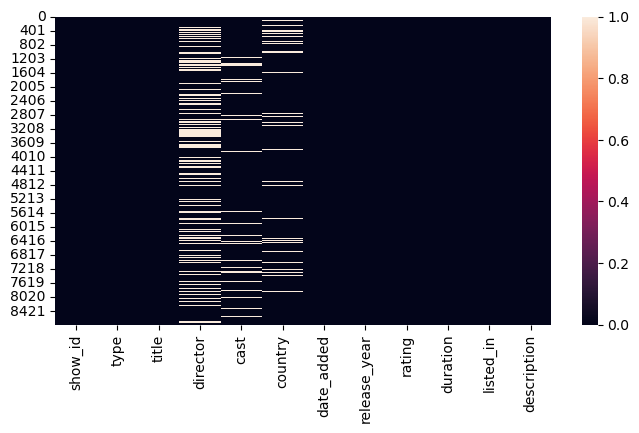

In [215]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())
plt.show()
#It can be seen maximum null values are present in columns director, cast and country.

DATA CLEANING

In [216]:
#First we will make a copy of the original dataframe
copy_df = df.copy()
copy_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [217]:
#Now we will fill the null values
copy_df.fillna({'director':'Unknown', 'cast':'Unknown','country':'Unknown', 'duration':'Unknown', 'rating':'Unknown'}, inplace=True)
copy_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [218]:
copy_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [219]:
copy_df[copy_df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [220]:
#It can be seen that there are 10 rows which do not have the values for date_added column. But before removing the null values for date_added we will check which type of entertainment media is present.

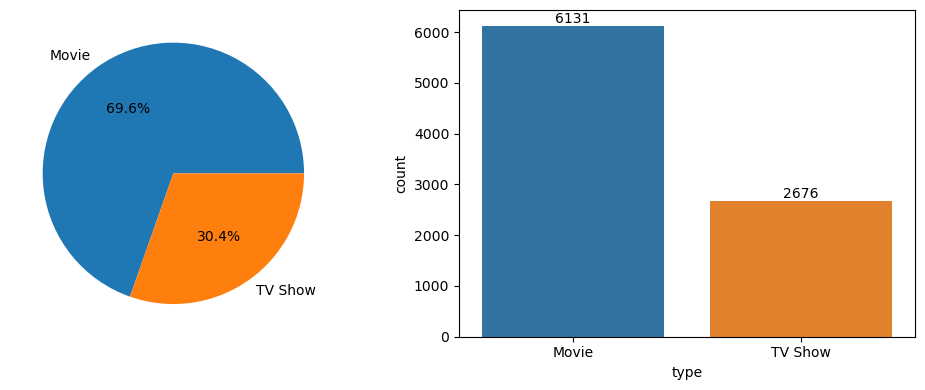

In [221]:
#Which entertainment media type has maximum presence in netflix?
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(copy_df['type'].value_counts(),labels =["Movie","TV Show"],autopct="%1.1f%%")
plt.subplot(1,2,2)
ax = sns.countplot(x=copy_df['type'],data=copy_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.tight_layout()
plt.show() 

In [222]:
#Therefore we can see that Netflix hosts more movies than TV shows.

In [223]:
#Now we will remove the null values from date_added
copy_df.dropna(inplace=True)

In [224]:
copy_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [225]:
copy_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [226]:
# Now we have removed all null values. We will convert date_added to month and year
copy_df['added_month'] = copy_df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
copy_df['added_year'] = copy_df['date_added'].apply(lambda x:x.split(',')[1])
copy_df[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [227]:
copy_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [228]:
# We will remove date_added and added_month columns
copy_df = copy_df.drop(['date_added', 'added_month'], axis=1)

In [229]:
copy_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


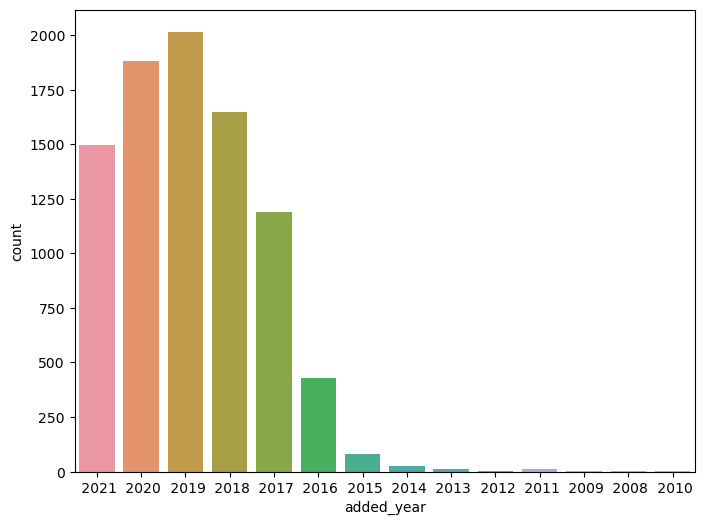

In [230]:
#In which year maximum content was added on Netflix?
plt.figure(figsize=(8,6))
sns.countplot(x=copy_df['added_year'], data=copy_df)
plt.show()

In [231]:
#It can be observed that during 2016-2019 the content was added in increasing ammounts with maximum in 2019 and then it dropped in 2020 and further in 2021. 

Text(0, 0.5, 'Number Of Movies Released')

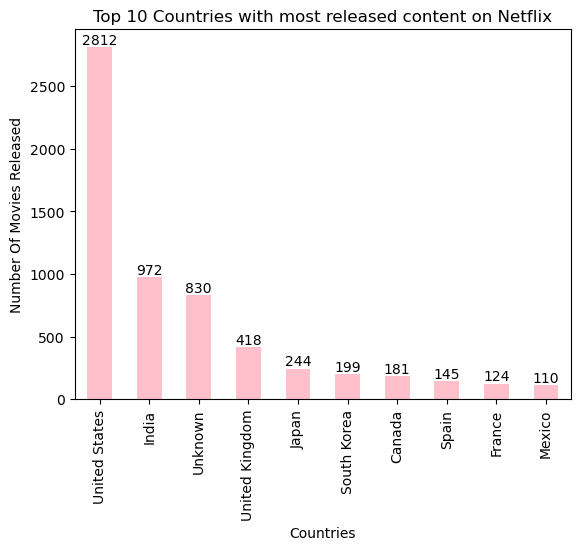

In [232]:
#Which countries have the maximum content release?
top_countries = copy_df["country"].value_counts().head(10).plot(kind='bar',color="pink")
for container in top_countries.containers:
    top_countries.bar_label(container, label_type='edge')
top_countries.set_title("Top 10 Countries with most released content on Netflix",fontsize=12)
top_countries.set_xlabel("Countries")
top_countries.set_ylabel("Number Of Movies Released")

In [233]:
#The maximum content was released in United States followed by India.

Text(0, 0.5, 'Number of Ratings')

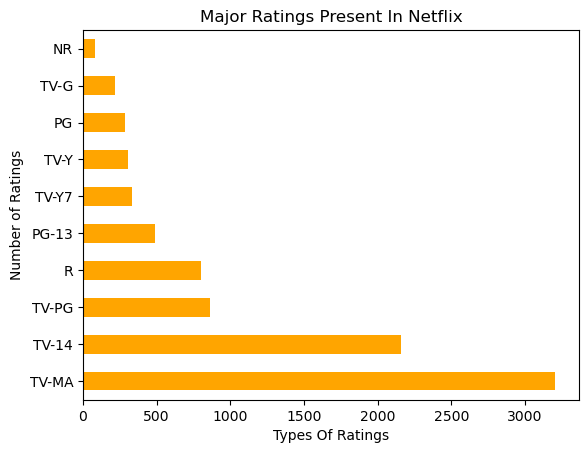

In [234]:
#What are the major ratings of the different content present on Netflix?
ratings = copy_df["rating"].value_counts().head(10).plot(kind='barh',color="orange")
ratings.set_title("Major Ratings Present In Netflix",fontsize=12)
ratings.set_xlabel("Types Of Ratings")
ratings.set_ylabel("Number of Ratings")

In [235]:
#People mostly prefer TV-MA, TV-14 and TV-PG ratings for TV shows while R and PG-13 for movies.

In [236]:
#We will analyze the different genres present in the listed_in column
genre_list = copy_df['listed_in'].str.split(',')

In [237]:
copy_df['genre_1'] = genre_list.str.get(0)
copy_df['genre_2'] = genre_list.str.get(1)
copy_df['genre_3'] = genre_list.str.get(2)

In [238]:
copy_df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,NaN


In [239]:
Gen1 = copy_df['genre_1'].value_counts()
Gen1 = Gen1.reset_index()
Gen1.columns = ['Category', 'Count']
Gen1.head()

,Category,Count
0,Dramas,1600
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,773


In [240]:
Gen2 = copy_df['genre_2'].value_counts()
Gen2 = Gen2.reset_index()
Gen2.columns = ['Category', 'Count']
Gen2.head()

,Category,Count
0,International Movies,1722
1,Dramas,758
2,Independent Movies,576
3,International TV Shows,476
4,Comedies,452


In [241]:
Gen3 = copy_df['genre_3'].value_counts()
Gen3 = Gen3.reset_index()
Gen3.columns = ['Category', 'Count']
Gen3.head()

,Category,Count
0,International Movies,902
1,Romantic Movies,442
2,TV Dramas,375
3,Thrillers,280
4,Music & Musicals,209


In [242]:
Gen1['Category'] = Gen1.Category.str.strip()
Gen2['Category'] = Gen2.Category.str.strip()
Gen3['Category'] = Gen3.Category.str.strip()

In [244]:
genre_merge = pd.merge(pd.merge(Gen1,Gen2,on='Category'),Gen3,on='Category')

In [246]:
genre_merge.head()

,Category,Count_x,Count_y,Count
0,Dramas,1600,758,69
1,Comedies,1210,452,12
2,Documentaries,829,39,1
3,International TV Shows,773,476,101
4,Children & Family Movies,605,32,4


In [247]:
genre_merge['Total_Count'] = genre_merge['Count_x'] + genre_merge['Count_y'] + genre_merge['Count'] 
genre_merge.drop(['Count_x','Count_y','Count'] , axis=1 , inplace=True)

In [248]:
genre_merge.head()

,Category,Total_Count
0,Dramas,2427
1,Comedies,1674
2,Documentaries,869
3,International TV Shows,1350
4,Children & Family Movies,641


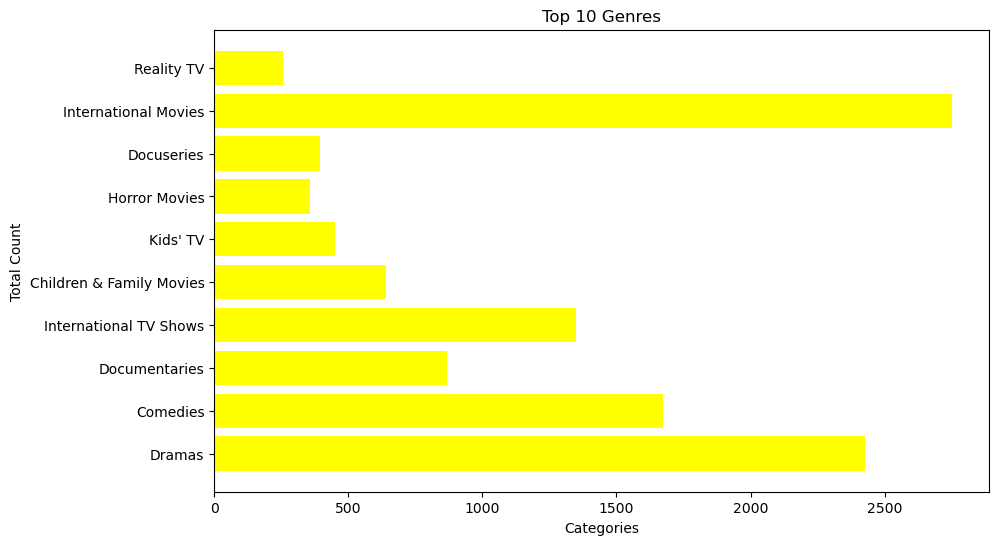

In [260]:
top_genre = genre_merge.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_genre['Category'], top_genre['Total_Count'] , color='yellow')
plt.title('Top 10 Genres')
plt.xlabel('Categories')
plt.ylabel('Total Count')
plt.show()

In [261]:
#The most watched genres are International movies, Dramas and Comedies.

In [262]:
#Which director has the highest number of movies and tv shows in Netflix?
director = copy_df.director.value_counts()
director

director
Unknown                           2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [265]:
director = copy_df.director.value_counts().head(11)
director = director.drop('Unknown' , axis=0)
director

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

<Axes: xlabel='director'>

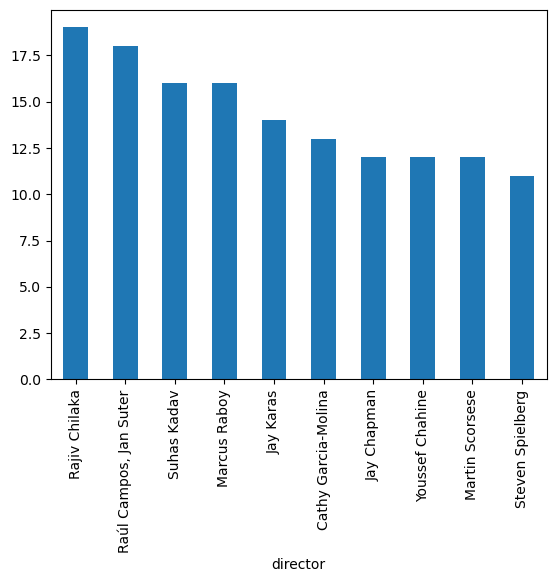

In [266]:
director.plot(kind='bar')

In [268]:
#If we want to know the contents released only in India
content_india = copy_df[copy_df['country'] == 'India']
content_india[['title']]

,title
4,Kota Factory
24,Jeans
39,Chhota Bheem
50,Dharmakshetra
66,Raja Rasoi Aur Anya Kahaniyan
...,...
8773,Yanda Kartavya Aahe
8775,Yeh Meri Family
8798,Zed Plus
8799,Zenda


In [270]:
#In this way we can get many insights and information from the dataset using python.